In [22]:
%reset -f
import pandas as pd
import numpy as np
import copy
import seaborn as sns

### Create Data

In [23]:
import scipy.stats as st
mu, sigma = 10, 5
s1 = st.norm(mu, sigma).rvs(10000)
s2 = st.norm(mu-2, sigma+2).rvs(1000)

df_1 = pd.DataFrame(s1,columns=["feat"]  )
df_1['Y'] = 0
df_2 = pd.DataFrame(s2,columns=["feat"]  )
df_2['Y'] = 1

df = pd.concat([df_1,df_2],axis=0)
df = df.reset_index(drop=True)
df.head(5)

,feat,Y
0,11.391857,0
1,12.847291,0
2,1.711159,0
3,16.713269,0
4,10.352779,0


In [27]:
import random
cnt=0
for i in range(10):
    N = random.uniform(0,20)
    df['feat_%i' %i] = st.norm(mu+N, sigma+N).rvs(len(df))
    cnt+=1

df.head(5)

,feat,Y,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
0,11.391857,0,37.011142,29.574938,9.350798,0.993683,2.400873,35.112600,23.195421,11.747264,10.384693,6.063892
1,12.847291,0,1.876335,37.479248,21.341392,4.570601,34.087902,55.079226,21.605402,1.789195,12.152657,30.276083
2,1.711159,0,56.418758,38.387833,51.366136,19.751823,-6.558894,79.685621,25.980058,-13.920233,16.734673,22.080820
3,16.713269,0,24.370615,21.701534,15.694490,15.686196,15.240284,8.370373,36.259566,24.243768,15.111416,-17.158803
4,10.352779,0,-6.660922,18.312440,28.396720,9.025535,17.672130,20.611153,10.667771,30.209854,11.986924,6.977354


### Step 1: Resume Table

In [28]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),5) 

    return summary

In [29]:
resumetable(df)

Dataset Shape: (11000, 12)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,feat,float64,0,11000,11.391857,12.847291,1.711159,13.42522
1,Y,int64,0,2,0.000000,0.000000,0.000000,0.43950
2,feat_0,float64,0,11000,37.011142,1.876335,56.418758,13.42522
3,feat_1,float64,0,11000,29.574938,37.479248,38.387833,13.42522
4,feat_2,float64,0,11000,9.350798,21.341392,51.366136,13.42522
5,feat_3,float64,0,11000,0.993683,4.570601,19.751823,13.42522
6,feat_4,float64,0,11000,2.400873,34.087902,-6.558894,13.42522
7,feat_5,float64,0,11000,35.112600,55.079226,79.685621,13.42522
8,feat_6,float64,0,11000,23.195421,21.605402,25.980058,13.42522
9,feat_7,float64,0,11000,11.747264,1.789195,-13.920233,13.42522


### Step 2: Density Plot based on KDE

In [31]:
df.shape

(11000, 12)

In [34]:
df.columns

Index(['feat', 'Y', 'feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5',
       'feat_6', 'feat_7', 'feat_8', 'feat_9'],
      dtype='object')

In [32]:
feat_col = ['feat']
def plot_feature_distribution(df1, df2, label1, label2, features,plot_rows,plot_cols):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,1,figsize=(15,11))

    for feature in features:
        i += 1
        plt.subplot(plot_rows,plot_cols,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

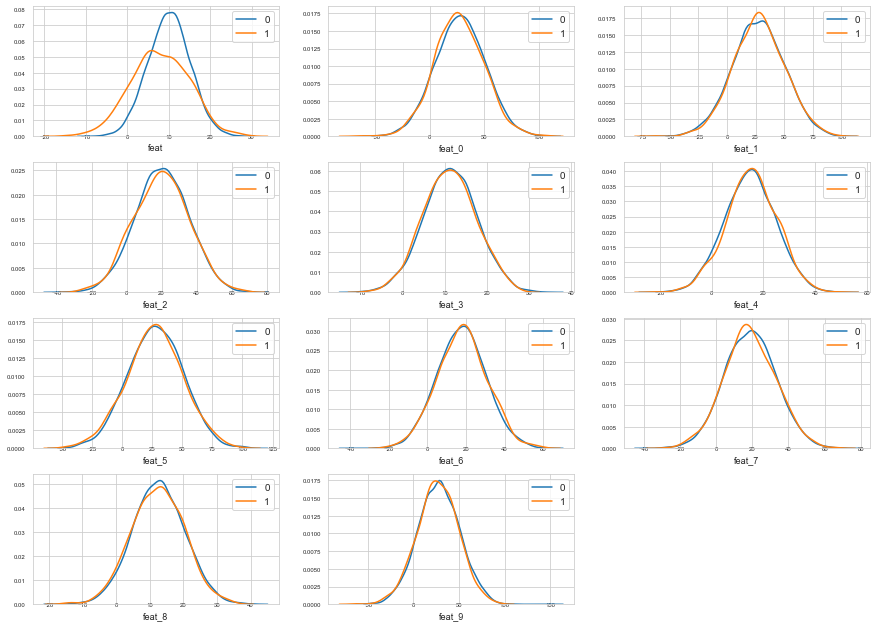

In [36]:
import matplotlib.pyplot as plt
feat_col = ['feat', 'feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9']

t0 = df.loc[df['Y'] == 0]
t1 = df.loc[df['Y'] == 1]
features = df.columns.values[0]
plot_feature_distribution(t0, t1, '0', '1', feat_col,4,3)